# Hotel Bookings Analysis

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from datetime import datetime
from pathlib import Path

In [2]:
# Save path to the data set
data_file = Path("Resources/hotel_bookings.csv")


In [3]:
# Use Pandas to read the data
data_file_df = pd.read_csv(data_file)
data_file_df.head()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [4]:
# Convert 'arrival_date_month' to its corresponding numeric value
month_mapping = {name: num for num, name in enumerate(calendar.month_name) if num}
data_file_df['month_num'] = data_file_df['arrival_date_month'].map(month_mapping)

# Combine 'arrival_date_year', 'arrival_date_month', and 'arrival_date_day_of_month' to a date format
data_file_df['arrival_date'] = pd.to_datetime(data_file_df[['arrival_date_year', 'month_num', 'arrival_date_day_of_month']].rename
                                      (columns={'arrival_date_year': 'year', 'month_num': 'month', 
                                                'arrival_date_day_of_month': 'day'}))

# Calculate the day of the week
data_file_df['day_of_week'] = data_file_df['arrival_date'].dt.day_name()
data_file_df.head()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month_num,arrival_date,day_of_week
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,0,Transient,0.0,0,0,Check-Out,1/7/2015,7,2015-07-01,Wednesday
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,0,Transient,0.0,0,0,Check-Out,1/7/2015,7,2015-07-01,Wednesday
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,0,Transient,75.0,0,0,Check-Out,2/7/2015,7,2015-07-01,Wednesday
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,0,Transient,75.0,0,0,Check-Out,2/7/2015,7,2015-07-01,Wednesday
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,0,Transient,98.0,0,1,Check-Out,3/7/2015,7,2015-07-01,Wednesday


In [5]:
data_file_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   index                           119390 non-null  int64         
 1   hotel                           119390 non-null  object        
 2   is_canceled                     119390 non-null  int64         
 3   lead_time                       119390 non-null  int64         
 4   arrival_date_year               119390 non-null  int64         
 5   arrival_date_month              119390 non-null  object        
 6   arrival_date_week_number        119390 non-null  int64         
 7   arrival_date_day_of_month       119390 non-null  int64         
 8   stays_in_weekend_nights         119390 non-null  int64         
 9   stays_in_week_nights            119390 non-null  int64         
 10  adults                          119390 non-null  int64  

A plot of bookings by country is unintelligeable, so the dataset is reduced to top 10 countries with highest bookings

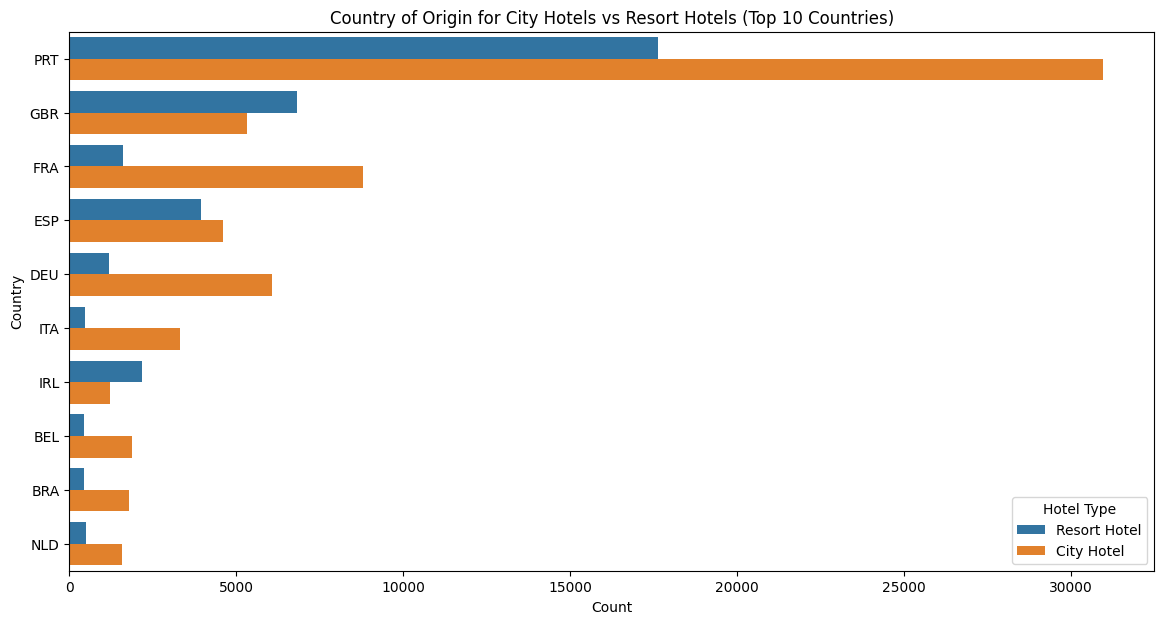

In [6]:
# Identify the top 10 countries by number of bookings
top_countries = data_file_df['country'].value_counts().head(10).index

# Filter the dataset to include only the top 10 countries
data_df = data_file_df[data_file_df['country'].isin(top_countries)]

# Plot for country of origin for the top 10 countries
plt.figure(figsize=(14, 7))
sns.countplot(y='country', hue='hotel', data=data_df, order=top_countries)
plt.title('Country of Origin for City Hotels vs Resort Hotels (Top 10 Countries)')
plt.xlabel('Count')
plt.ylabel('Country')
plt.legend(title='Hotel Type')
plt.show()

# Customer Segments by hotel type

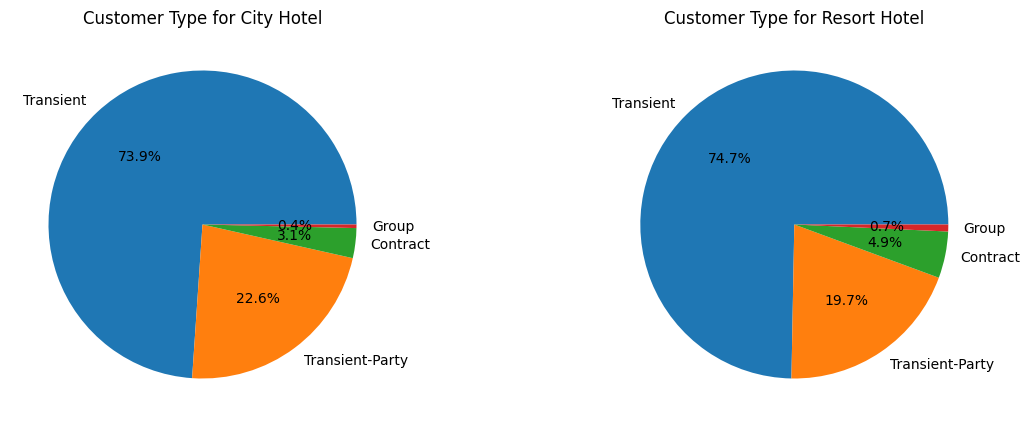

In [7]:
# First, we need to get the counts for each customer type for each hotel
city_hotel_counts = data_df[data_df['hotel'] == 'City Hotel']['customer_type'].value_counts()
resort_hotel_counts = data_df[data_df['hotel'] == 'Resort Hotel']['customer_type'].value_counts()

# Now we can plot the pie charts
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].pie(city_hotel_counts, labels=city_hotel_counts.index, autopct='%1.1f%%')
ax[0].set_title('Customer Type for City Hotel')

ax[1].pie(resort_hotel_counts, labels=resort_hotel_counts.index, autopct='%1.1f%%')
ax[1].set_title('Customer Type for Resort Hotel')

plt.show()

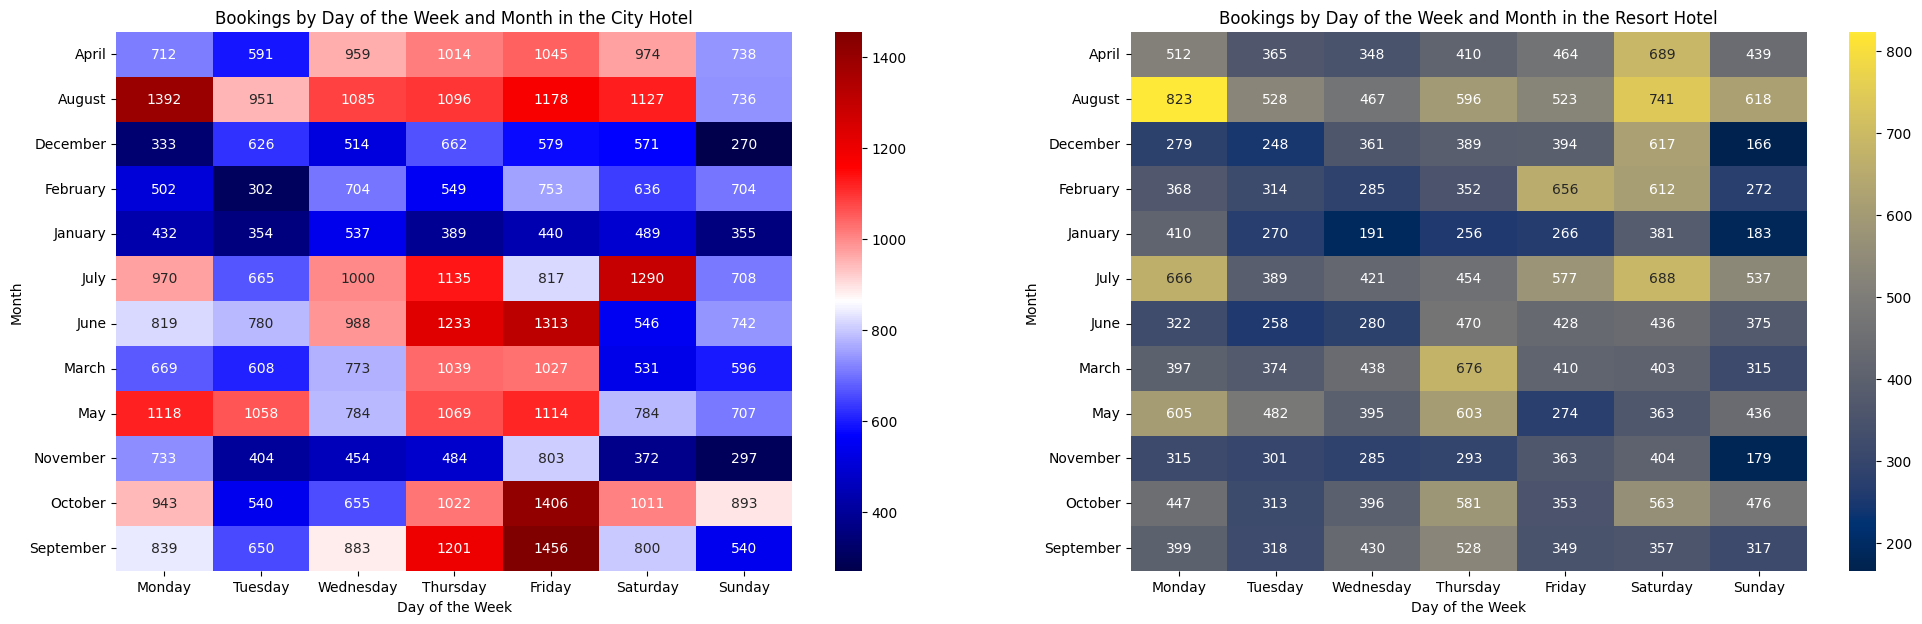

In [8]:
# Map the month names to numbers
# Get Rows associated with City Hotel
city_data = data_df.loc[data_df['hotel'] == 'City Hotel']

# Create a pivot table with counts of bookings
pivot_table_city = city_data.pivot_table(index='arrival_date_month', columns='day_of_week', aggfunc='size', fill_value=0, observed=False)

# Order the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table_city = pivot_table_city[days_order]  # Reorder the columns

# Get Rows associated with Resort Hotel
resort_data = data_df.loc[data_df['hotel'] == 'Resort Hotel']

# Create a pivot table with counts of bookings
pivot_table_resort = resort_data.pivot_table(index='arrival_date_month', columns='day_of_week', aggfunc='size', fill_value=0, observed=False)
pivot_table_resort = pivot_table_resort[days_order]  # Reorder the columns

# Create the heatmaps
fig, ax = plt.subplots(1, 2, figsize=(24, 7))

sns.heatmap(pivot_table_city, annot=True, fmt="d", cmap="seismic", ax=ax[0])
ax[0].set_title('Bookings by Day of the Week and Month in the City Hotel')
ax[0].set_xlabel('Day of the Week')
ax[0].set_ylabel('Month')

sns.heatmap(pivot_table_resort, annot=True, fmt="d", cmap="cividis", ax=ax[1])
ax[1].set_title('Bookings by Day of the Week and Month in the Resort Hotel')
ax[1].set_xlabel('Day of the Week')
ax[1].set_ylabel('Month')

plt.show()

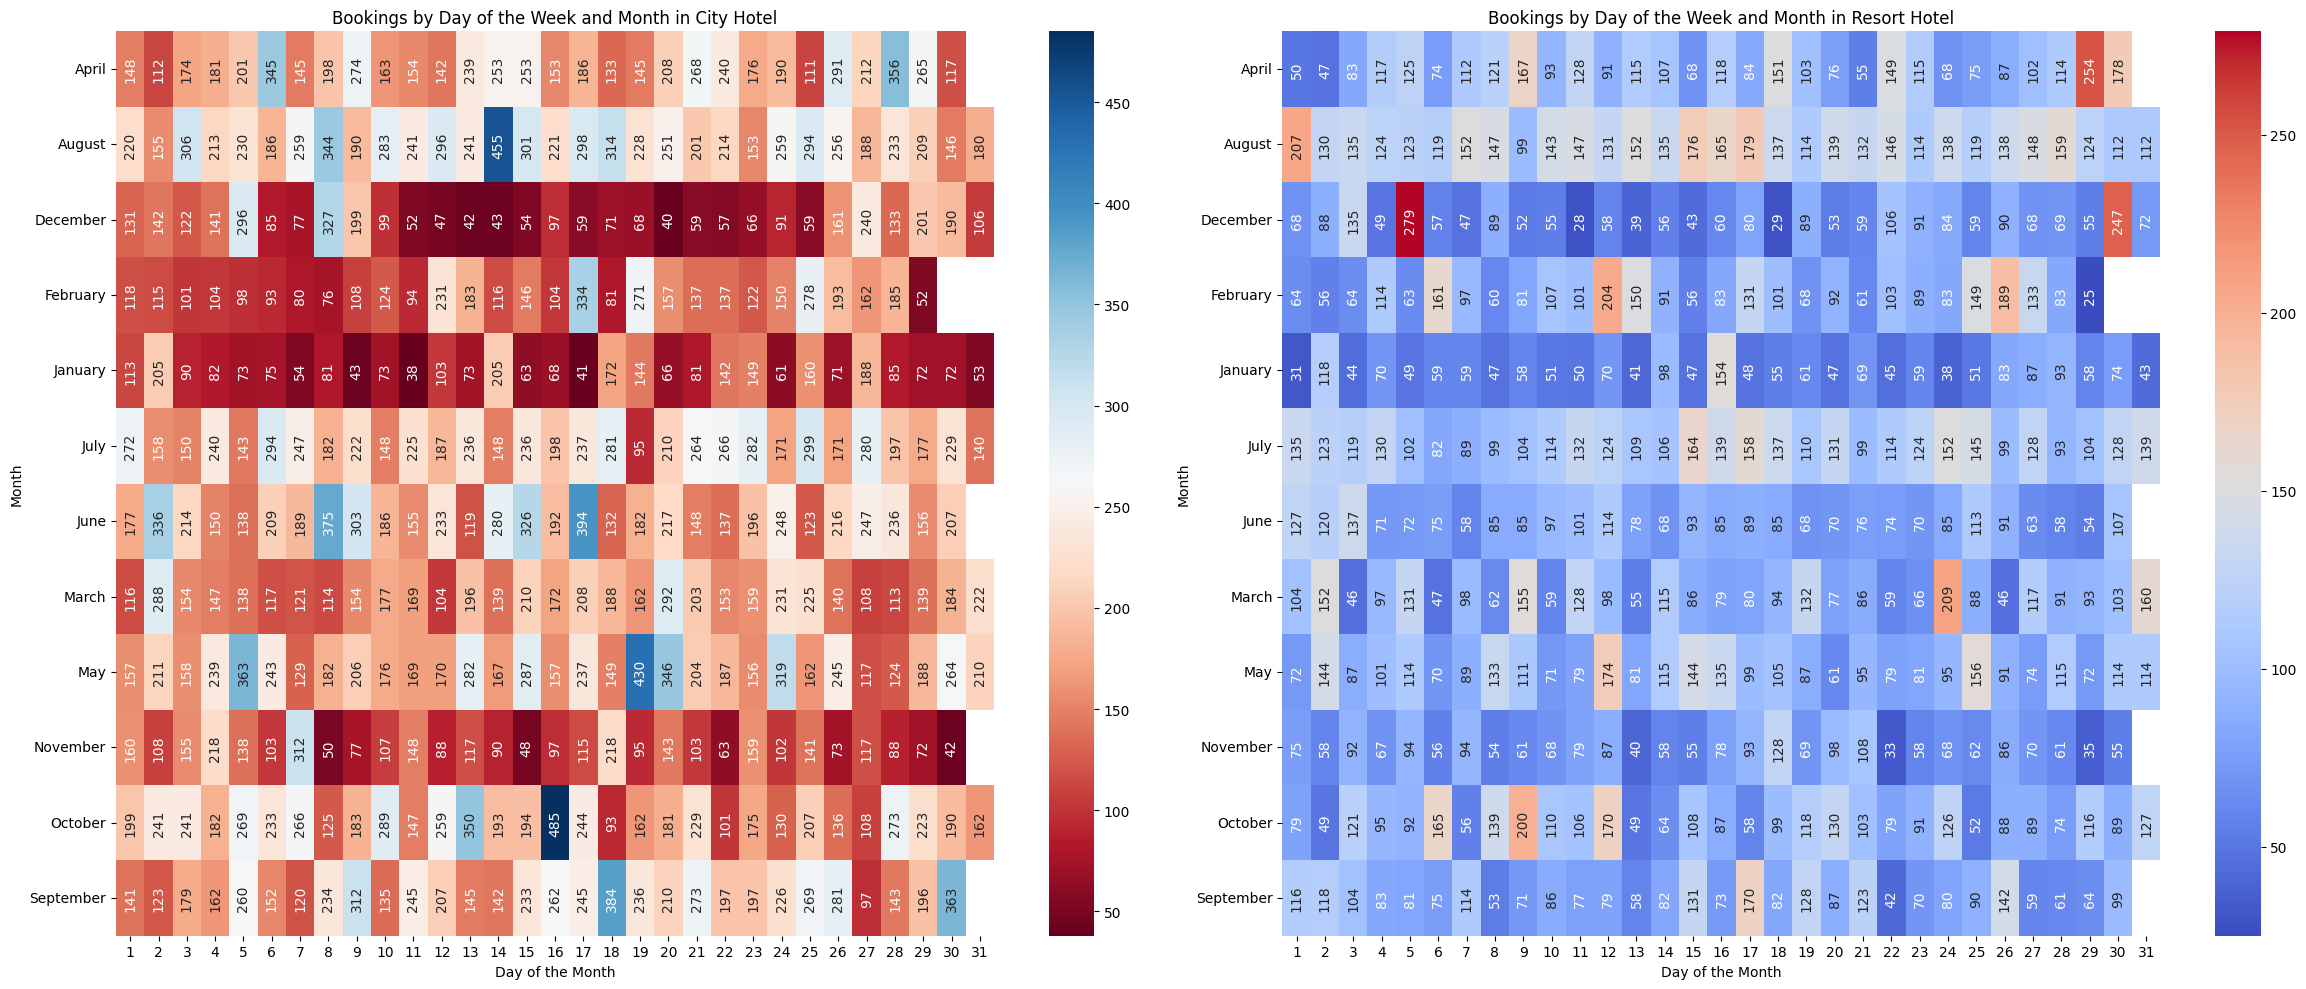

In [9]:
# Convert 'arrival_date_month' to categorical with correct ordering
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']

# Filter data for City Hotel
chotel_df_city = data_df.loc[data_df['hotel'] == 'City Hotel']

# Convert 'arrival_date_month' in City Hotel data to categorical with specified order
chotel_df_city.loc[:, 'arrival_date_month'] = pd.Categorical(chotel_df_city['arrival_date_month'], categories=months_order, ordered=True)

# Create a pivot table for City Hotel, aggregating bookings by month and day of the month
pivot_city = chotel_df_city.pivot_table(index='arrival_date_month', columns='arrival_date_day_of_month', values='hotel', 
                                        aggfunc='size', observed=False)

# Reindex columns to ensure days are in correct chronological order
pivot_city = pivot_city.reindex(columns=range(1, 32))

# Filter data for Resort Hotel
rhotel_df_resort = data_df.loc[data_df['hotel'] == 'Resort Hotel']

# Convert 'arrival_date_month' in Resort Hotel data to categorical with specified order
rhotel_df_resort.loc[:, 'arrival_date_month'] = pd.Categorical(rhotel_df_resort['arrival_date_month'], categories=months_order, ordered=True)

# Create a pivot table for Resort Hotel, aggregating bookings by month and day of the month
pivot_resort = rhotel_df_resort.pivot_table(index='arrival_date_month', columns='arrival_date_day_of_month', values='hotel', 
                                            aggfunc='size', observed=False)

# Reindex columns to ensure days are in correct chronological order
pivot_resort = pivot_resort.reindex(columns=range(1, 32))

# Plotting using Seaborn heatmap, creating subplots for City Hotel and Resort Hotel
fig, ax =plt.subplots(1, 2, figsize=(24, 10))

# Heatmap for City Hotel
sns.heatmap(pivot_city, annot=True, fmt='g', cmap="RdBu", annot_kws={'rotation': 90}, ax=ax[0])
ax[0].set_title('Bookings by Day of the Week and Month in City Hotel')
ax[0].set_xlabel('Day of the Month')
ax[0].set_ylabel('Month')

# Heatmap for Resort Hotel
sns.heatmap(pivot_resort, annot=True, fmt='g', cmap="coolwarm", annot_kws={'rotation': 90}, ax=ax[1])
ax[1].set_title('Bookings by Day of the Week and Month in Resort Hotel')
ax[1].set_xlabel('Day of the Month')
ax[1].set_ylabel('Month')

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plot
plt.show()



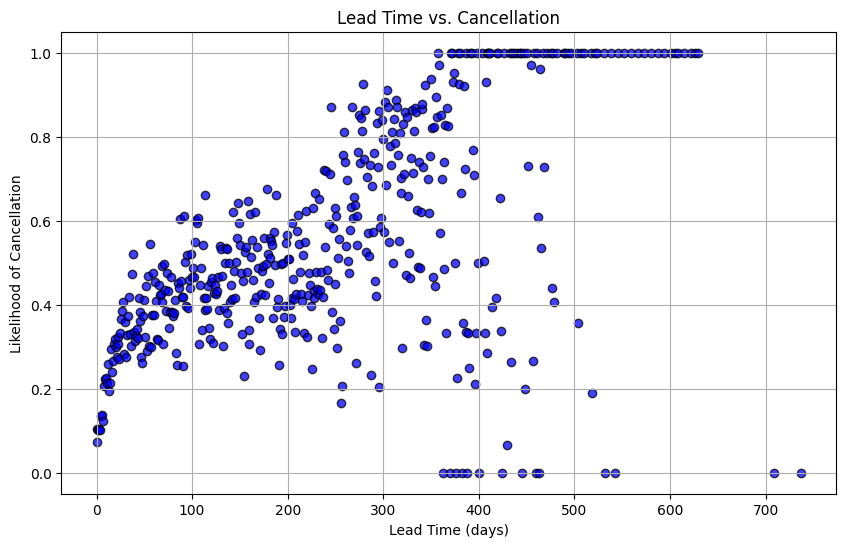

In [10]:

# Assuming your dataset is loaded into a DataFrame named df
# Filter data to include only relevant columns
df_filtered = data_df[['lead_time', 'is_canceled']]

# Group by lead time and calculate cancellation likelihood (mean cancellation rate)
grouped = df_filtered.groupby('lead_time')['is_canceled'].mean().reset_index()

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(grouped['lead_time'], grouped['is_canceled'], edgecolor='black', color='blue', alpha=0.75)
plt.title('Lead Time vs. Cancellation')
plt.xlabel('Lead Time (days)')
plt.ylabel('Likelihood of Cancellation')
plt.grid(True)
plt.show()


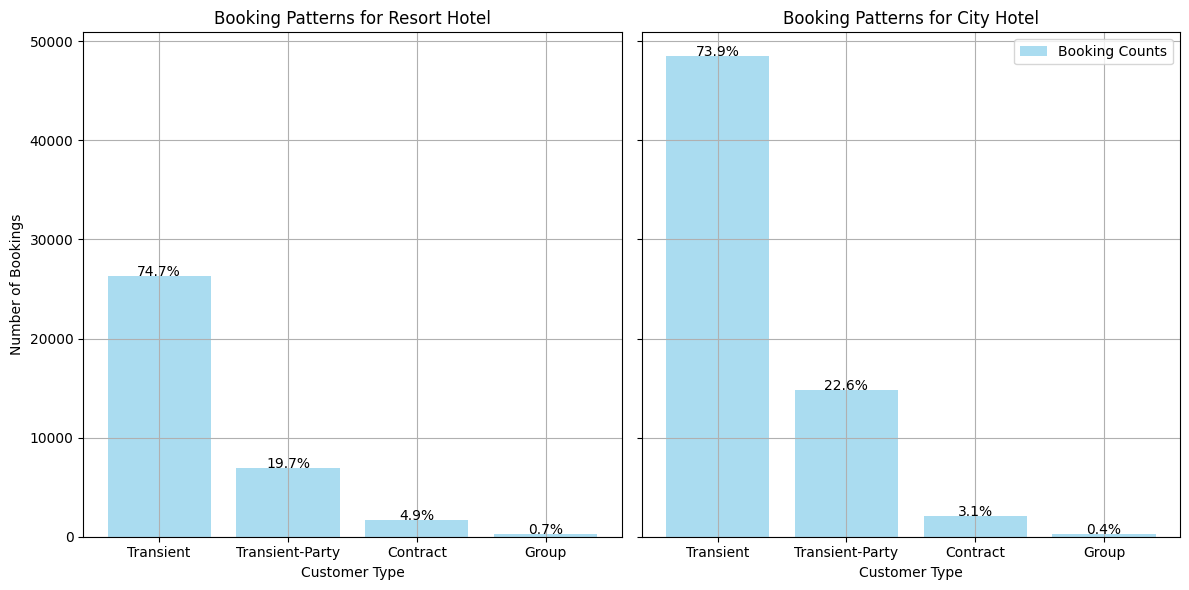

In [11]:

# Filter data for each hotel
hotel_names = data_df['hotel'].unique()

# Create subplots for each hotel
fig, axs = plt.subplots(1, len(hotel_names), figsize=(12, 6), sharey=True)

for i, hotel in enumerate(hotel_names):
    # Filter data for current hotel
    df_hotel = data_df[data_df['hotel'] == hotel]
    
    # Group by 'customer_type' and count the number of bookings for each type
    booking_counts = df_hotel['customer_type'].value_counts()
    
    # Calculate percentage of bookings for each customer type
    booking_percents = booking_counts / booking_counts.sum() * 100
    
    # Bar plot for current hotel
    axs[i].bar(booking_counts.index, booking_counts.values, color='skyblue', alpha=0.7, label='Booking Counts')
    
    # Add percentages as text labels on each bar
    for j, v in enumerate(booking_counts.values):
        axs[i].text(j, v + 10, f'{booking_percents.values[j]:.1f}%', ha='center', fontsize=10)
    
    axs[i].set_title(f'Booking Patterns for {hotel}')
    axs[i].set_xlabel('Customer Type')
    axs[i].grid(True)
    
# Set common ylabel and legend
axs[0].set_ylabel('Number of Bookings')
axs[-1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [12]:

# Group by 'hotel' and 'market_segment' and aggregate bookings, cancellations, and ADR
grouped = data_df.groupby(['hotel', 'market_segment']).agg({
    'is_canceled': 'sum',                # Total cancellations
    'adr': 'mean',                       # Average Daily Rate
    'arrival_date_year': 'count'         # Total bookings (counting any column, e.g., 'arrival_date_year')
}).rename(columns={'arrival_date_year': 'bookings'}) # Rename 'arrival_date_year' count to 'bookings'

# Calculate percentage cancellations relative to total bookings
grouped['cancel_percent'] = grouped['is_canceled'] / grouped['bookings'] * 100

# Convert ADR to two decimal places
grouped['adr'] = grouped['adr'].round(2)

# Reset index to flatten the grouped DataFrame for plotting
grouped = grouped.reset_index()

# Display the data for verification
print(grouped)



           hotel market_segment  is_canceled     adr  bookings  cancel_percent
0     City Hotel       Aviation           49  100.50       191       25.654450
1     City Hotel  Complementary           57    2.49       525       10.857143
2     City Hotel      Corporate          636   82.08      2735       23.254113
3     City Hotel         Direct          832  117.55      4843       17.179434
4     City Hotel         Groups         9586   84.60     12872       74.471722
5     City Hotel  Offline TA/TO         7151   93.23     15480       46.195090
6     City Hotel      Online TA        10579  118.17     28920       36.580221
7     City Hotel      Undefined            2   15.00         2      100.000000
8   Resort Hotel  Complementary           32    3.81       189       16.931217
9   Resort Hotel      Corporate          338   51.97      2043       16.544298
10  Resort Hotel         Direct          811  110.97      5780       14.031142
11  Resort Hotel         Groups         2462   66.02

          hotel market_segment  is_canceled     adr  bookings  cancel_percent
0    City Hotel      Corporate            5  134.49        12       41.666667
1    City Hotel         Direct            8  114.39        15       53.333333
2    City Hotel  Offline TA/TO            5  110.16        13       38.461538
3    City Hotel      Online TA           12  136.02        16       75.000000
4  Resort Hotel      Corporate            3   90.09         6       50.000000
5  Resort Hotel         Direct            5  126.79        11       45.454545
6  Resort Hotel  Offline TA/TO            9  109.75        14       64.285714
7  Resort Hotel      Online TA            4  121.18        13       30.769231


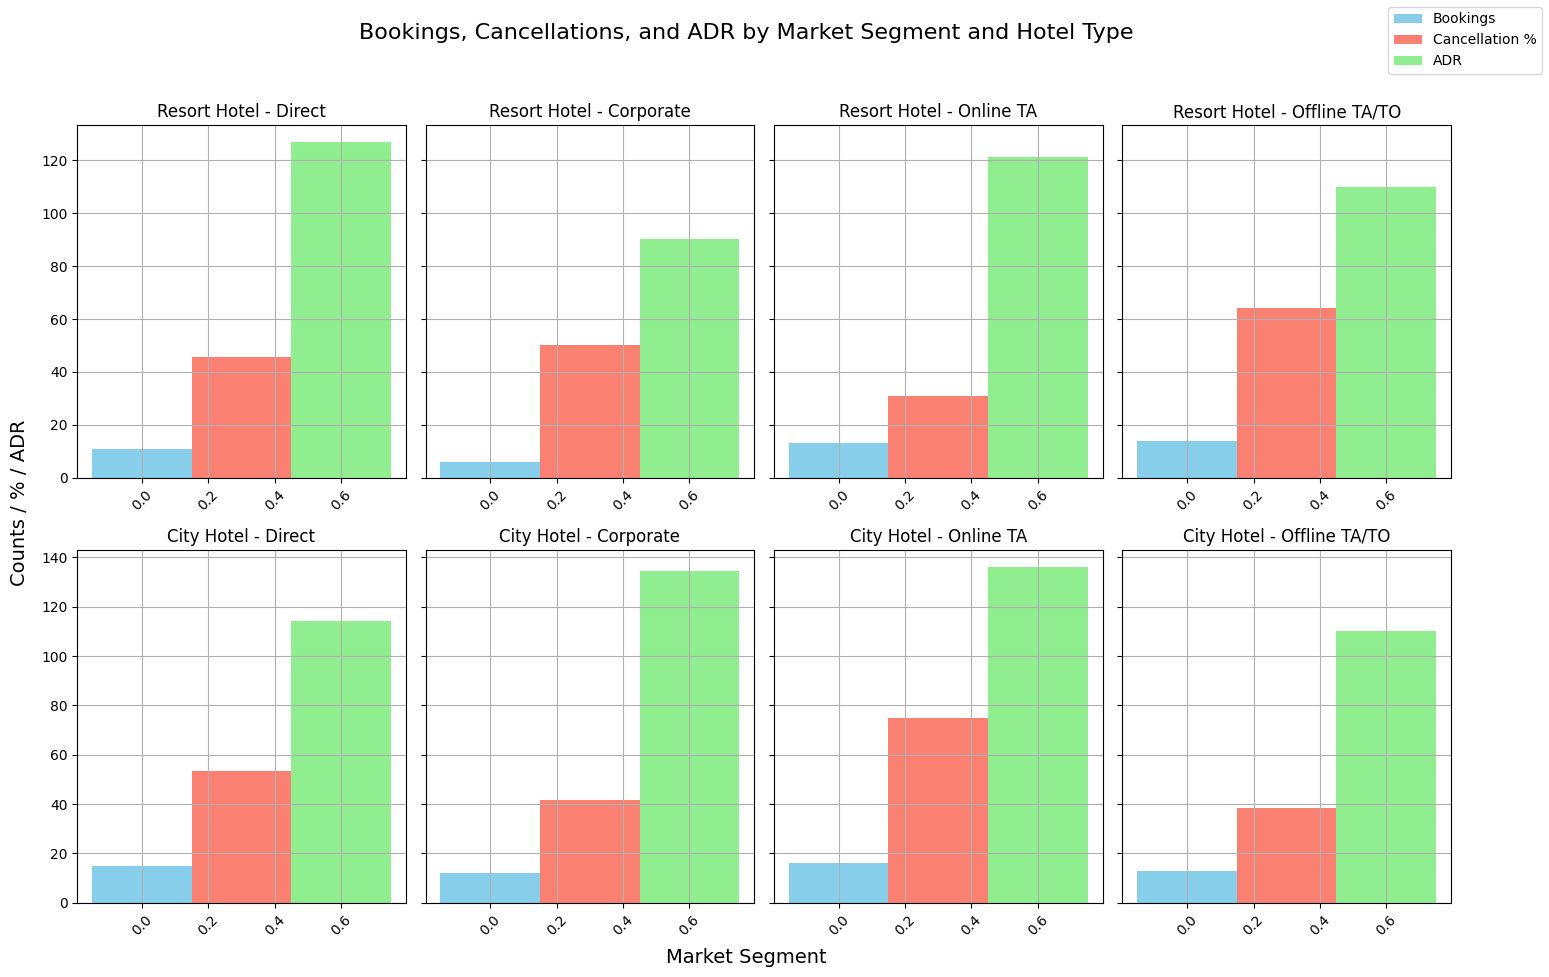

In [13]:

# Sample data generation (replace with your actual data)
np.random.seed(0)
hotel_types = ['Resort Hotel', 'City Hotel']
market_segments = ['Direct', 'Corporate', 'Online TA', 'Offline TA/TO']

data = {
    'hotel': np.random.choice(hotel_types, size=100),
    'market_segment': np.random.choice(market_segments, size=100),
    'is_canceled': np.random.randint(0, 2, size=100),
    'adr': np.random.uniform(50, 200, size=100)
}
df = pd.DataFrame(data)

# Group by 'hotel' and 'market_segment' and aggregate bookings, cancellations, and ADR
grouped = df.groupby(['hotel', 'market_segment']).agg({
    'is_canceled': 'sum',                # Total cancellations
    'adr': 'mean',                       # Average Daily Rate
    'hotel': 'size'                     # Total bookings (counting any column, e.g., 'hotel')
}).rename(columns={'hotel': 'bookings'}) # Rename 'hotel' count to 'bookings'

# Calculate percentage cancellations relative to total bookings
grouped['cancel_percent'] = grouped['is_canceled'] / grouped['bookings'] * 100

# Convert ADR to two decimal places
grouped['adr'] = grouped['adr'].round(2)

# Reset index to flatten the grouped DataFrame for plotting
grouped = grouped.reset_index()

# Display the data for verification
print(grouped)

# Set up figure and axes
fig, axs = plt.subplots(len(hotel_types), len(market_segments), figsize=(16, 10), sharey='row')

# Iterate over hotel types
for i, hotel in enumerate(hotel_types):
    # Filter data for current hotel
    df_hotel = grouped[grouped['hotel'] == hotel]
    
    # Iterate over market segments
    for j, segment in enumerate(market_segments):
        # Filter data for current market segment in current hotel
        data = df_hotel[df_hotel['market_segment'] == segment]
        
        # Define bar positions and widths
        bar_positions = np.arange(len(data))  # Number of bars to plot
        bar_width = 0.3
        
        # Plot bars for bookings, cancellation percentage, and ADR
        axs[i, j].bar(bar_positions, data['bookings'], width=bar_width, color='skyblue', label='Bookings')
        axs[i, j].bar(bar_positions + bar_width, data['cancel_percent'], width=bar_width, color='salmon', label='Cancellation %')
        axs[i, j].bar(bar_positions + 2 * bar_width, data['adr'], width=bar_width, color='lightgreen', label='ADR')
        
        # Add title to each subplot
        axs[i, j].set_title(f'{hotel} - {segment}')
        
        # Rotate x-axis labels for better readability
        axs[i, j].tick_params(axis='x', rotation=45)
        
        # Add grid for clarity
        axs[i, j].grid(True)

# Add legend to the figure
fig.legend(['Bookings', 'Cancellation %', 'ADR'], loc='upper right')

# Add common labels and title
fig.suptitle('Bookings, Cancellations, and ADR by Market Segment and Hotel Type', fontsize=16)
fig.text(0.5, 0.04, 'Market Segment', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Counts / % / ADR', va='center', rotation='vertical', fontsize=14)

# Adjust layout and show plot
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
plt.show()


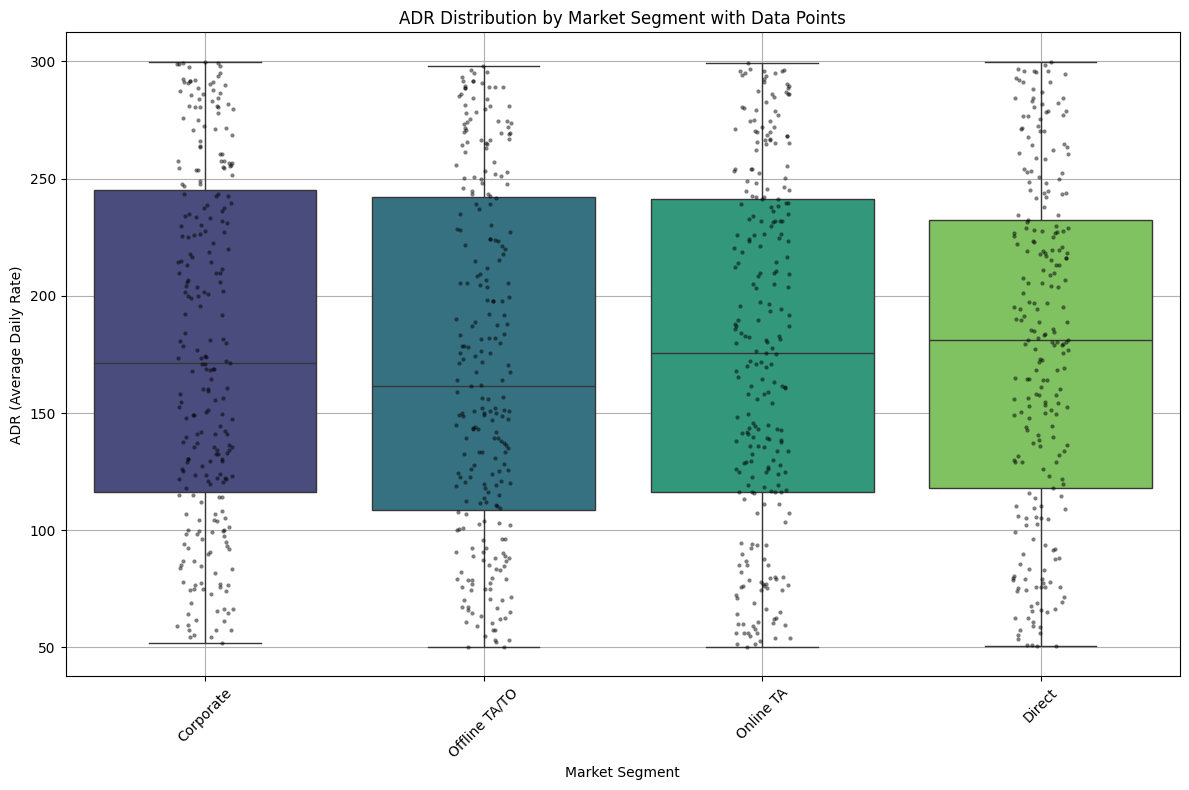

In [14]:

# Generate example data (replace with your actual data)
np.random.seed(0)
segments = np.random.choice(['Corporate', 'Online TA', 'Direct', 'Offline TA/TO'], size=1000)
adr_values = np.random.uniform(50, 300, size=1000)
data_df = pd.DataFrame({'market_segment': segments, 'adr': adr_values})

# Create a Box Plot with data points using Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x='market_segment', y='adr', data=data_df, palette='viridis', hue='market_segment', dodge=False)
sns.stripplot(x='market_segment', y='adr', data=data_df, color='black', size=3, alpha=0.5)

# Remove the legend (legend=False)
plt.legend([],[], frameon=False)

# Add labels and title
plt.title('ADR Distribution by Market Segment with Data Points')
plt.xlabel('Market Segment')
plt.ylabel('ADR (Average Daily Rate)')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()
